<a href="https://colab.research.google.com/github/Tobsam237/Springboard_Project_Capstone2/blob/main/Preprocessing_and_Training_Data_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Capstone Two: Preprocessing and Training Data Development

In [1]:
#import neccessary packages and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_wrangled2.csv to data_wrangled2.csv


In [3]:
df = pd.read_csv('data_wrangled2.csv',parse_dates= {'date' : ['crash_date', 'crash_time']}, index_col= 'date')
df.head()

,Unnamed: 0,index,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,latitude,longitude,borough,zip_code
date,,,,,,,,,,,,,,,,,
2020-05-11 15:21:00,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313062,Sedan,40.852306,-73.898110,BRONX,10457.0
2020-05-11 13:20:00,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Backing Unsafely,4313088,Station Wagon/Sport Utility Vehicle,40.637585,-74.119934,STATEN ISLAND,10310.0
2020-05-11 17:30:00,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Backing Unsafely,4313056,Station Wagon/Sport Utility Vehicle,40.620430,-73.951490,BROOKLYN,11210.0
2020-05-11 18:24:00,3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unspecified,4313208,Motorcycle,40.760800,-73.939150,QUEENS,11106.0
2020-05-11 09:34:00,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Following Too Closely,4313242,Ambulance,40.790417,-73.951840,MANHATTAN,10029.0


In [4]:
#qick cleaning of df
df = df.drop(['Unnamed: 0', 'index', 'collision_id'], axis=1)
df.describe()

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,latitude,longitude,zip_code
count,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000,86100.000000
mean,0.436074,0.002520,0.055923,0.000999,0.060465,0.000267,0.319686,0.001254,40.519887,-73.538398,10898.046632
std,0.781209,0.053066,0.242178,0.031954,0.244790,0.016342,0.751786,0.039135,2.891970,5.247040,516.435702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.251150,10000.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.665630,-73.956474,10456.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.713190,-73.916445,11208.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.795993,-73.865420,11239.000000
max,16.000000,3.000000,7.000000,2.000000,7.000000,1.000000,16.000000,3.000000,40.912884,0.000000,11697.000000


In [5]:
df.dtypes

number_of_persons_injured        float64
number_of_persons_killed         float64
number_of_pedestrians_injured    float64
number_of_pedestrians_killed     float64
number_of_cyclist_injured        float64
number_of_cyclist_killed         float64
number_of_motorist_injured       float64
number_of_motorist_killed        float64
contributing_factor_vehicle_1     object
vehicle_type_code1                object
latitude                         float64
longitude                        float64
borough                           object
zip_code                         float64
dtype: object

In [7]:
#let's create a new feature to count each accidents
df['accident_count'] = 1

In [9]:
#More exploratory data analysis

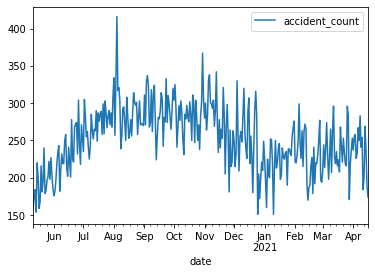

In [10]:
#Lets resample to obtain accident count by day
df.accident_count.resample('D').sum().to_frame().plot()

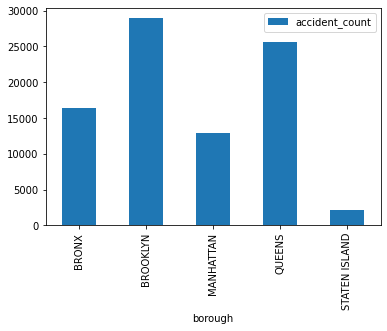

In [11]:
#total accident counts by borough
df[['borough', 'accident_count']].groupby('borough').sum().plot(kind='bar')

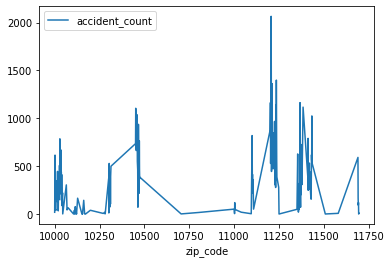

In [12]:
#accident_count by zip range
df[['zip_code', 'accident_count']].groupby('zip_code').sum().plot()

In [ ]:
#Lets prepare our data for forecasting

In [44]:
df1 = df[['accident_count', 'borough']].resample('D').agg({'accident_count': 'sum', 'borough': 'first' }).reset_index()

In [46]:
df1.rename(columns= {'date': 'ds', 'accident_count': 'y'}, inplace= True)

In [48]:
#obtain dummy variables for boroughs
df1 = pd.get_dummies(df1)
df1.head()

,ds,y,borough_BRONX,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND
0,2020-05-11,160,0,0,0,1,0
1,2020-05-12,175,0,0,0,1,0
2,2020-05-13,184,0,1,0,0,0
3,2020-05-14,154,0,0,1,0,0
4,2020-05-15,220,0,0,1,0,0


In [63]:
#lets split df to prep for modelling(NB: we cant use sklearn train_test_split to avoid random selection, so we split by indexing)
df_train = df1[:int(df1.shape[0]*0.7)]
df_test = df1[int(df1.shape[0]*0.7):]